<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'winequality_merged.csv'

In [3]:
# load csv file
data = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [4]:
# ANSWER
data.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [5]:
data.tail().T

,6492,6493,6494,6495,6496
fixed acidity,6.20000,6.6000,6.50000,5.50000,6.00000
volatile acidity,0.21000,0.3200,0.24000,0.29000,0.21000
citric acid,0.29000,0.3600,0.19000,0.30000,0.38000
residual sugar,1.60000,8.0000,1.20000,1.10000,0.80000
chlorides,0.03900,0.0470,0.04100,0.02200,0.02000
free sulfur dioxide,24.00000,57.0000,30.00000,20.00000,22.00000
total sulfur dioxide,92.00000,168.0000,111.00000,110.00000,98.00000
density,0.99114,0.9949,0.99254,0.98869,0.98941
pH,3.27000,3.1500,2.99000,3.34000,3.26000
sulphates,0.50000,0.4600,0.46000,0.38000,0.32000


In [6]:
data.shape

(6497, 13)

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

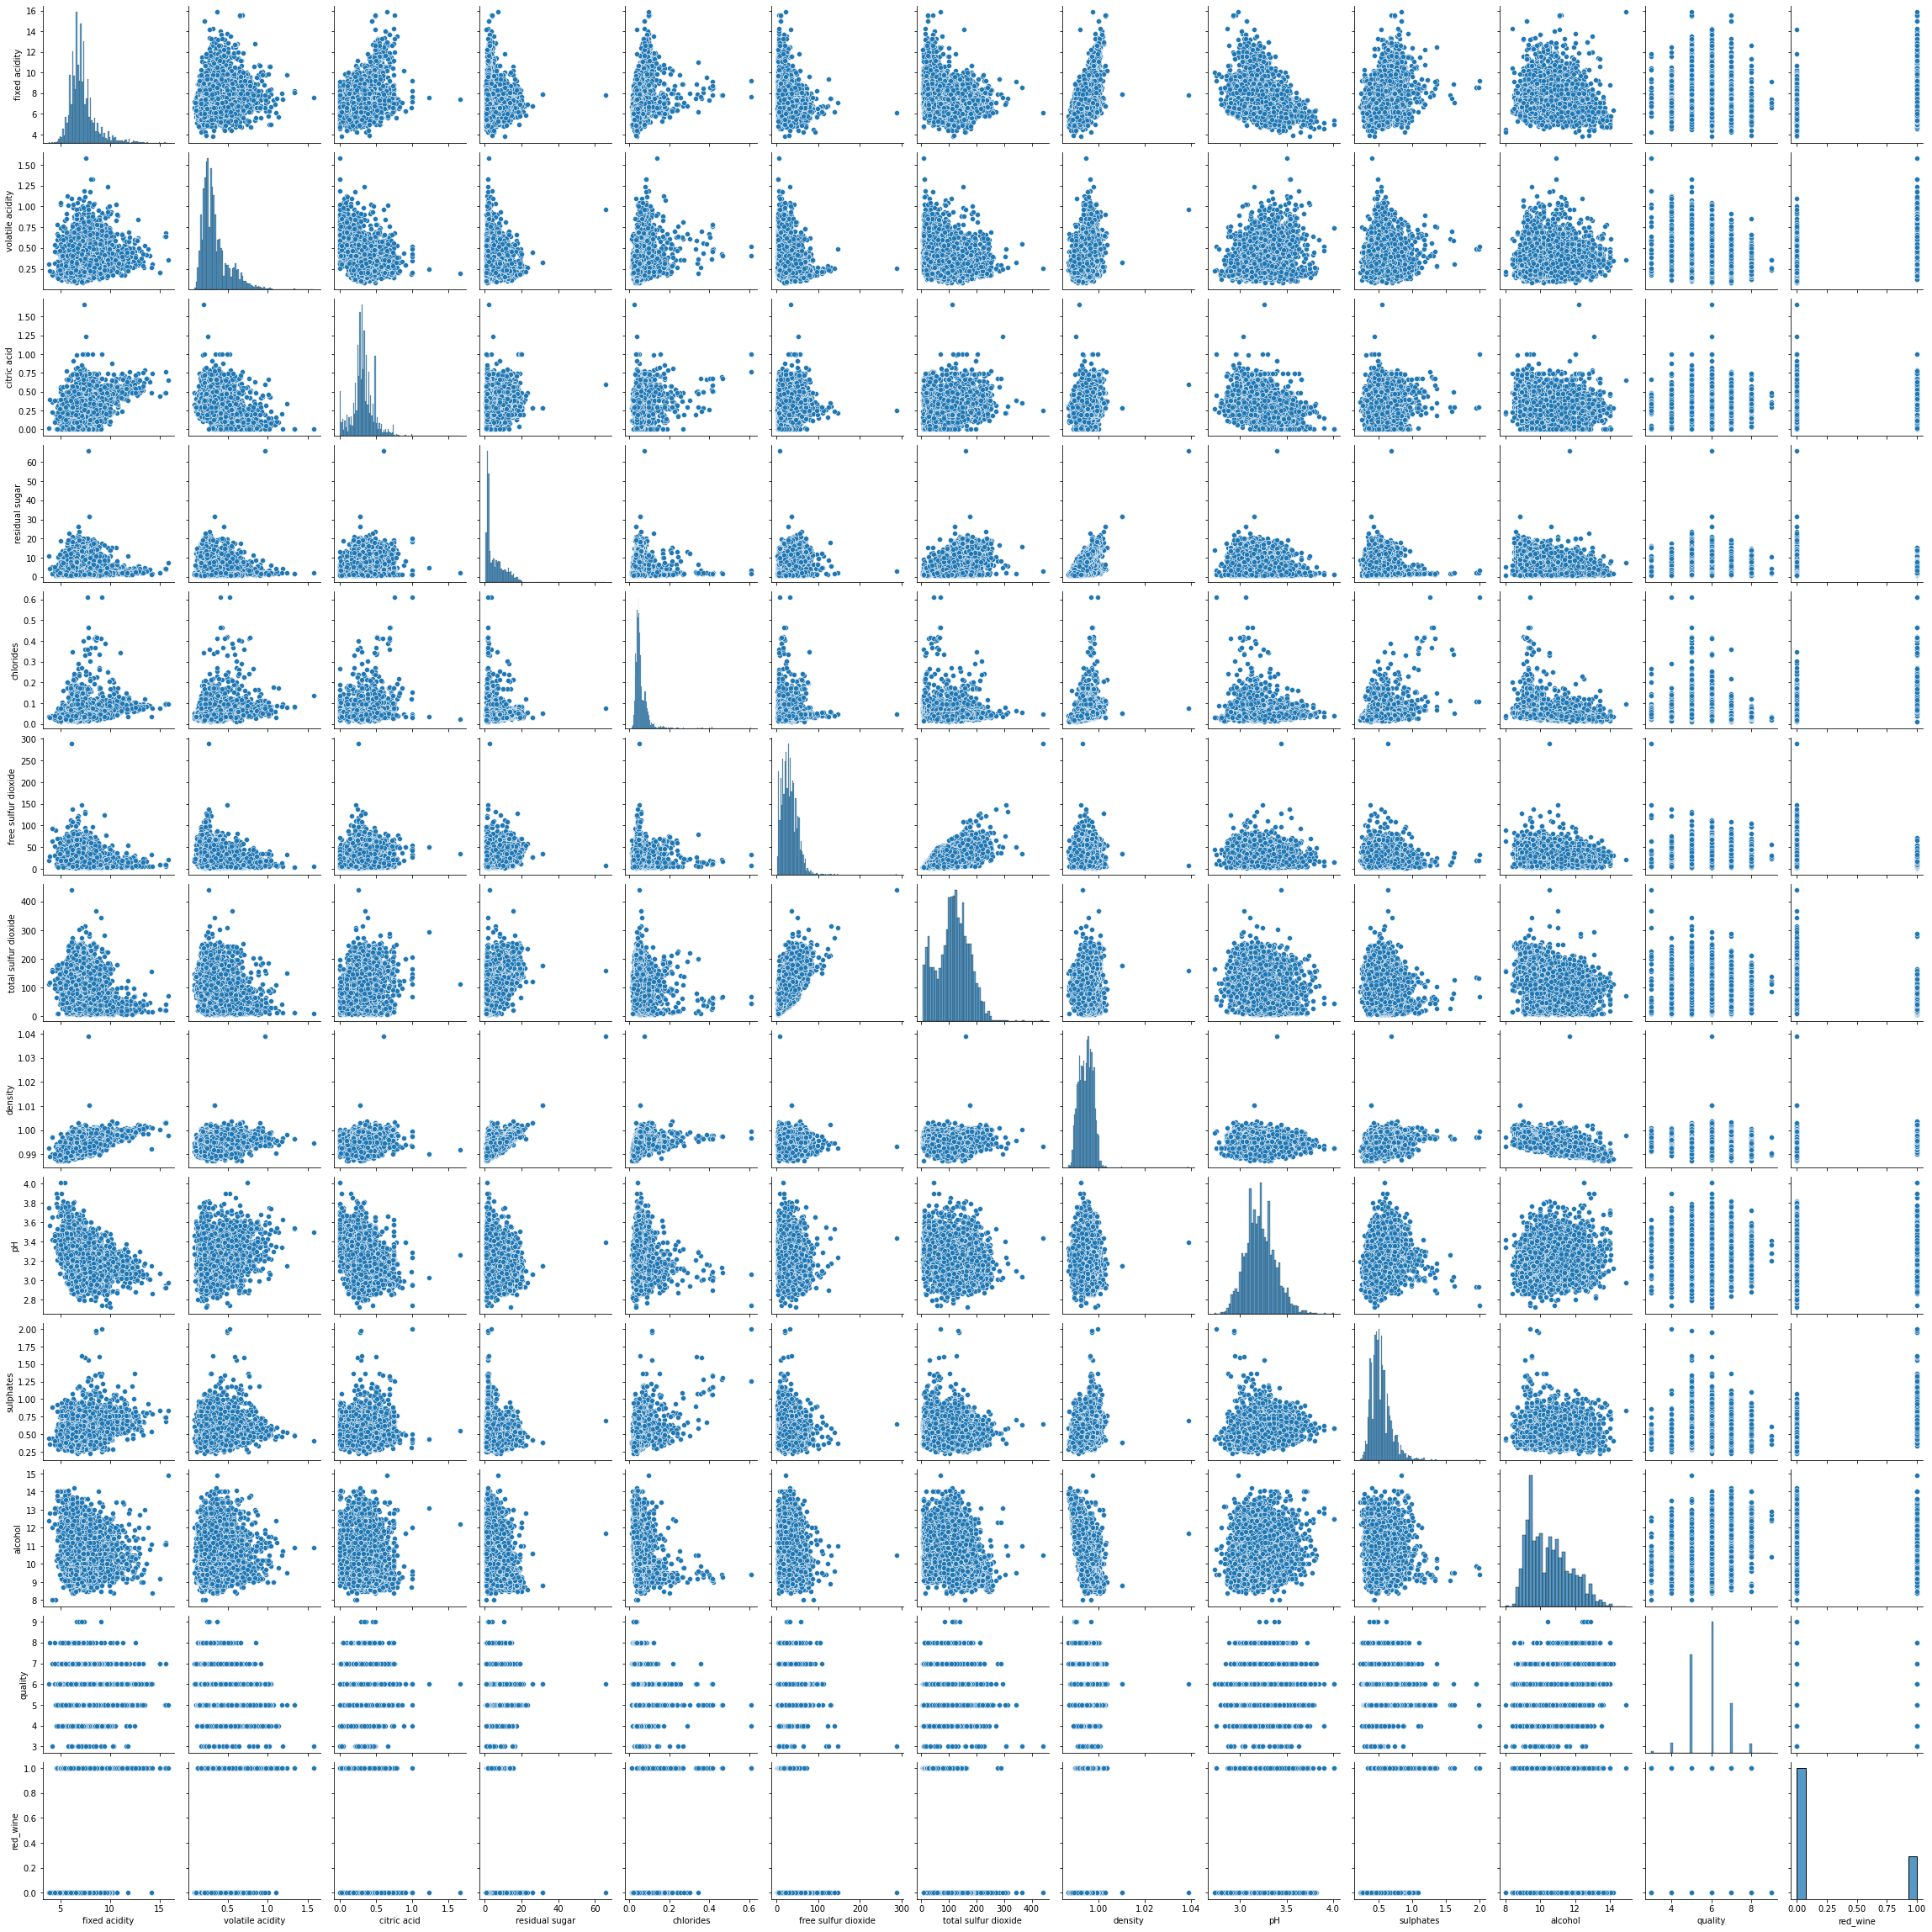

In [11]:
sns.pairplot(data)
plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [12]:
# Target Variable
### quality column is the Target variable
y = data['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [13]:
data.corr().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


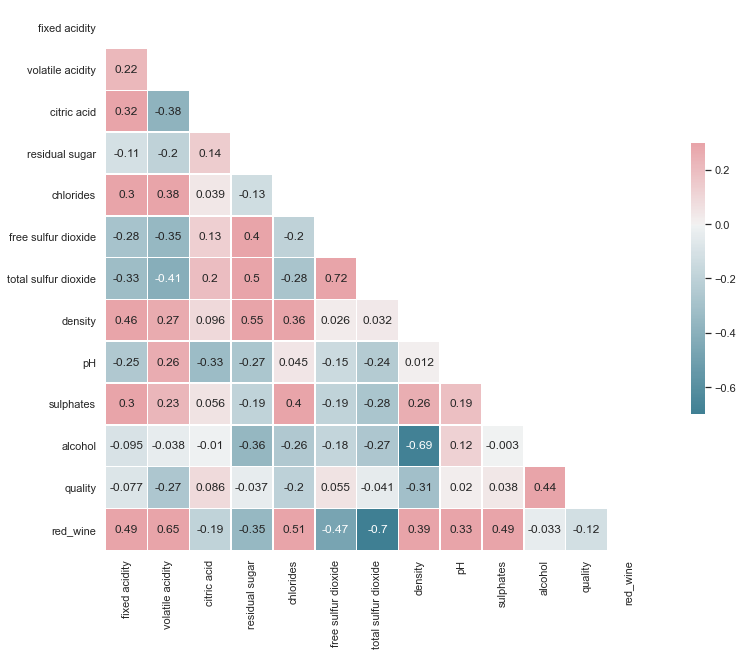

In [14]:
# ANSWER
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [15]:
# Check correlation
data.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [16]:
# Chose the features which are strongly correlated with quality
predictor_columns = ['density', 'volatile acidity', 'chlorides', 'alcohol']

In [17]:
X = data[predictor_columns]
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


### 4. Using Linear Regression Create a Model and Test Score

In [18]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Define X,y  predictor and target variables
X = data[['density', 'volatile acidity', 'chlorides', 'alcohol']]
y = data[['quality']]

In [20]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
# Create a model for Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

# Fit the model with the Training data
lr.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
lr.score(X_train, y_train)
         
print("The (R^2 for Regression) score for Training Data is ", lr.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
         
print("The (R^2 for Regression) for Testing Data is ", lr.score(X_test, y_test))

The (R^2 for Regression) score for Training Data is  0.2707886547599645
The (R^2 for Regression) for Testing Data is  0.2521354751304966


In [22]:
X.columns

Index(['density', 'volatile acidity', 'chlorides', 'alcohol'], dtype='object')

In [23]:
lr.coef_

array([[40.83297487, -1.51250401, -0.08243747,  0.39187742]])

In [24]:
type(lr.coef_)

numpy.ndarray

### BONUS: Cross validation

In [25]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error as mse

In [26]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
X_k_fold = data[['alcohol']]
k_fold_regr = LinearRegression()
metrics_df_index = []
for k, (train, test) in enumerate(k_fold.split(X_k_fold)):
    k_fold_regr = LinearRegression()
    # Get training and test sets for X and y
    # Fit model with training set
    k_fold_regr.fit(data.iloc[train,[10]],data.iloc[train,11])
    # Make predictions with training and test set
    prediction_train = k_fold_regr.predict(data.iloc[train,[10]])
    prediction_test = k_fold_regr.predict(data.iloc[test,[10]])
    print(prediction_train,prediction_test)
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(k_fold_regr.score(data.iloc[train,[10]],data.iloc[train,11]))
    train_rmse.append(mse(data.iloc[train,11],prediction_train))
    test_scores.append(k_fold_regr.score(data.iloc[test,[10]],data.iloc[test,11]))
    test_rmse.append(mse(data.iloc[test,11],prediction_test))
    text = 'fold_{k}'.format(k=k+1)
    metrics_df_index.append(text)
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'training_r2':train_scores,
              'training_rmse':train_rmse,
              'test_r2':test_scores,
              'test_rmse':test_rmse},index=metrics_df_index)
metrics_df

[5.47043514 5.59703056 5.59703056 ... 5.47043514 6.54649621 6.23000766] [5.66032827 5.40713743 5.37548857 ... 6.34077865 6.23000766 5.5653817 ]
[5.58990399 5.58990399 5.46036377 ... 5.46036377 6.5614557  6.23760513] [5.46036377 5.58990399 5.46036377 ... 5.52513388 6.26999018 5.49274882]
[5.46658074 5.59796599 5.46658074 ... 5.56511967 5.53227336 6.25489222] [5.59796599 5.59796599 5.46658074 ... 6.05781435 5.46658074 6.58335534]
[5.46312955 5.59312451 5.59312451 ... 6.04810685 5.46312955 6.56808668] [5.46312955 5.49562829 5.82061568 ... 5.46312955 5.52812703 6.24309929]
[5.45534211 5.58854178 5.58854178 ... 5.45534211 6.58753933 6.25454015] [5.55524186 5.42204219 5.55524186 ... 6.15464039 5.52194195 6.65413916]


,training_r2,training_rmse,test_r2,test_rmse
fold_1,0.191152,0.608778,0.220126,0.625134
fold_2,0.198482,0.606718,0.192926,0.632897
fold_3,0.200418,0.611697,0.184177,0.613184
fold_4,0.194056,0.621475,0.211539,0.573756
fold_5,0.203224,0.610715,0.172883,0.617233


In [27]:
# Define X,y  predictor and target variables
X = data[['density', 'volatile acidity', 'chlorides', 'alcohol']]
y = data[['quality']]

In [28]:
from sklearn.metrics import mean_squared_error
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    
    
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    
    
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.271735,0.246742,0.742442,0.767762
2,0.263765,0.281193,0.749372,0.739749
3,0.271235,0.249620,0.749301,0.739975
4,0.263096,0.281645,0.742407,0.767581
5,0.267655,0.266021,0.752939,0.724842


In [29]:
print(metrics_df)

   Training R2   Test R2  Training RMSE  Test RMSE
1     0.271735  0.246742       0.742442   0.767762
2     0.263765  0.281193       0.749372   0.739749
3     0.271235  0.249620       0.749301   0.739975
4     0.263096  0.281645       0.742407   0.767581
5     0.267655  0.266021       0.752939   0.724842


In [30]:
# Describe the metrics
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.267497,0.265044,0.747292,0.747982
std,0.004039,0.016660,0.004681,0.018992
min,0.263096,0.246742,0.742407,0.724842
25%,0.263765,0.249620,0.742442,0.739749
50%,0.267655,0.266021,0.749301,0.739975
75%,0.271235,0.281193,0.749372,0.767581
max,0.271735,0.281645,0.752939,0.767762


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [31]:
# code for r2 score  LinearRegression().score(X,y)
print('R2 score=', lr.score(X,y))

R2 score= 0.26734896526144314


**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



